In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-04-25 02:26:03.764562: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 02:26:04.063593: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 02:26:05.150335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 02:26:09.032275: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Path to the directory containing the training and validation data
data_dir = '/home/davinci/Desktop/dt'

# Dimensions of input images
img_width, img_height = 224, 224

# Batch size for training and validation
batch_size = 32

# Number of training and validation samples
num_train_samples = 119 # total number of images in 'yes' and 'no' folders
num_val_samples = 119   # total number of images in 'yes' and 'no' folders

# Number of epochs for training
epochs = 10

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

Found 96 images belonging to 2 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 23 images belonging to 2 classes.


In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the pre-trained model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

2024-04-25 02:37:00.268641: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-04-25 02:37:00.304148: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-04-25 02:37:00.319535: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.


In [8]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=num_val_samples // batch_size
)

Epoch 1/10


2024-04-25 02:39:03.191190: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-04-25 02:39:03.238114: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
/home/davinci/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 50s 17s/step - accuracy: 0.5299 - loss: 1.4259 - val_accuracy: 0.6522 - val_loss: 1.5835
Epoch 2/10


2024-04-25 02:39:51.778861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-04-25 02:39:51.823424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6522 - val_loss: 1.5261
Epoch 3/10


2024-04-25 02:40:02.303910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step - accuracy: 0.6849 - loss: 1.8796 - val_accuracy: 0.6087 - val_loss: 0.5322
Epoch 4/10


2024-04-25 02:41:12.633103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:41:12.651549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:41:21.809495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4348 - val_loss: 0.6187
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.7370 - loss: 1.1684 - val_accuracy: 0.6522 - val_loss: 0.7407
Epoch 6/10


2024-04-25 02:42:34.786740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:42:34.805285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:42:43.778211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6522 - val_loss: 0.7969
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 17s/step - accuracy: 0.7669 - loss: 1.0278 - val_accuracy: 0.8696 - val_loss: 0.1167
Epoch 8/10


2024-04-25 02:43:57.492396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:43:57.507958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8696 - val_loss: 0.1166
Epoch 9/10


2024-04-25 02:44:07.093215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 45s 16s/step - accuracy: 0.8151 - loss: 0.5037 - val_accuracy: 0.8696 - val_loss: 0.2218
Epoch 10/10


2024-04-25 02:44:52.417313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-25 02:44:52.435675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8696 - val_loss: 0.2391


2024-04-25 02:45:00.906998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


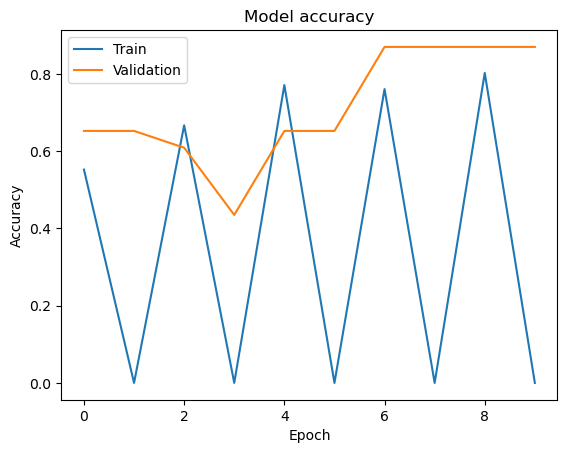

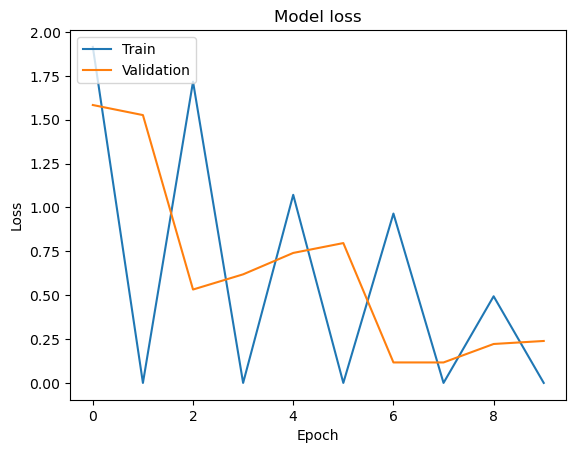

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Certainly! Interpreting the graphs:

1. **Model Accuracy Plot**:
   - The **training accuracy** curve shows how well the model performs on the training data over epochs. It indicates the percentage of correctly classified images in the training set.
   - The **validation accuracy** curve shows the model's performance on a separate validation dataset, which it hasn't seen during training. It helps to assess how well the model generalizes to unseen data.
   - If the training accuracy continues to increase while the validation accuracy plateaus or decreases, it could indicate overfitting, where the model learns to memorize the training data instead of learning general patterns.

2. **Model Loss Plot**:
   - The **training loss** curve represents the value of the loss function (binary cross-entropy in this case) on the training data over epochs. It measures how well the model's predictions match the actual labels.
   - The **validation loss** curve shows the loss on the validation data. Similar to accuracy, it helps in understanding how well the model generalizes.
   - A decreasing training loss indicates that the model is learning, while a validation loss decreasing along with it shows that the model is generalizing well. However, if the validation loss starts increasing while the training loss decreases, it could indicate overfitting.

In summary, we aim for both accuracy curves to increase and loss curves to decrease. However, we also want to ensure that the validation curves follow the same trend as the training curves, indicating good generalization performance. If there's a significant gap between training and validation curves, it could indicate overfitting.

In [17]:
 from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image
img_path = '/home/davinci/Desktop/Dataset/archive/Testing/pituitary_tumor/image(67).jpg'  # Change this to the path of your MRI image
img = image.load_img(img_path, target_size=(img_width, img_height))

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Make predictions
prediction = model.predict(img_array)

# Print the prediction
if prediction < 0.5:
    print("No tumor detected")
else:
    print("Tumor detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
No tumor detected
